## Interprétabilité du modèle de Credit Scoring (SHAP)

### Objectifs
- Comprendre les décisions globales du modèle LightGBM
- Identifier les variables les plus influentes sur le risque de défaut
- Expliquer les décisions individuelles client par client
- Rendre le modèle conforme aux exigences réglementaires

In [ ]:
import numpy as np
import pandas as pd
import shap
import matplotlib.pyplot as plt

from joblib import load

c:\Users\GENERAL STORES-SARL\AppData\Local\Programs\Python\Python313\Lib\site-packages\tqdm\auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [2]:
# Chargement du pipeline final
model = load("../data/models/final_model_lgbm.pkl")

# Chargement des données
X_train, X_test, y_train, y_test = load("../data/models/train_test_split.pkl")

In [3]:
def get_feature_names(preprocessor):
    feature_names = []

    for name, transformer, cols in preprocessor.transformers_:
        if transformer == "drop":
            continue
        if hasattr(transformer, "get_feature_names_out"):
            names = transformer.get_feature_names_out(cols)
        else:
            names = cols
        feature_names.extend(names)

    return feature_names

In [4]:
feature_names = get_feature_names(
    model.named_steps["preprocessor"]
)

In [5]:
X_train_processed = pd.DataFrame(
    model.named_steps["preprocessor"].transform(X_train),
    columns=feature_names
)

X_test_processed = pd.DataFrame(
    model.named_steps["preprocessor"].transform(X_test),
    columns=feature_names
)

In [6]:
explainer = shap.TreeExplainer(model.named_steps["model"])
shap_values = explainer.shap_values(X_train_processed)

c:\Users\GENERAL STORES-SARL\AppData\Local\Programs\Python\Python313\Lib\site-packages\shap\explainers\_tree.py:587: UserWarning: LightGBM binary classifier with TreeExplainer shap values output has changed to a list of ndarray
  warnings.warn(


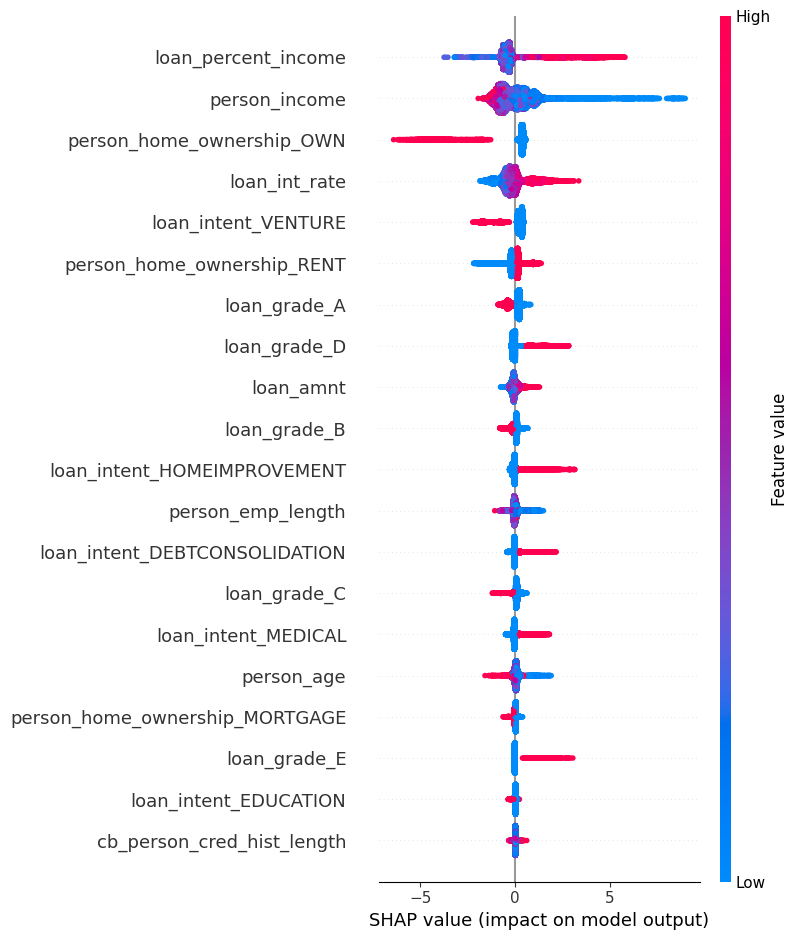

In [7]:
shap.summary_plot(shap_values, X_train_processed)

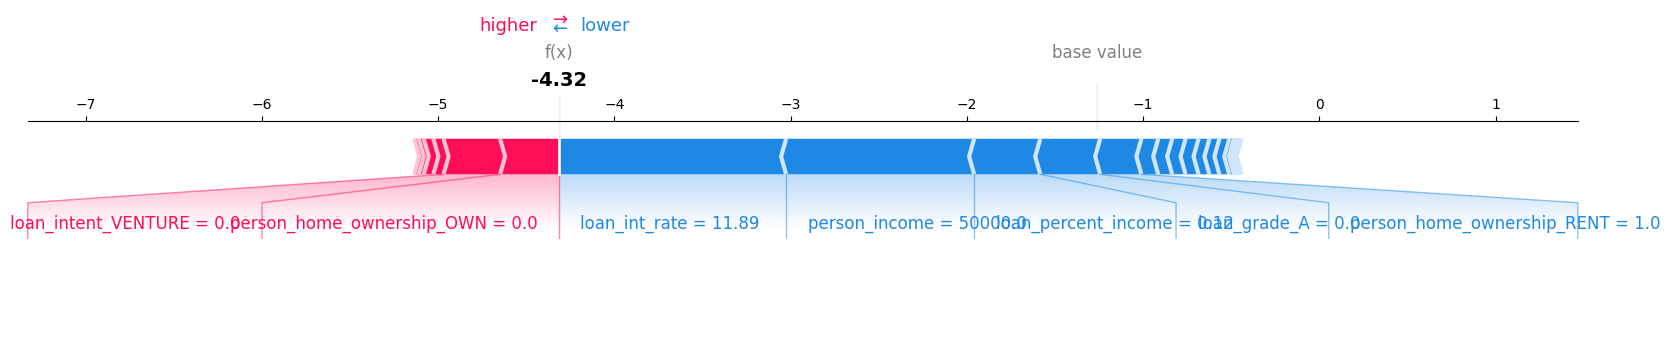

In [8]:
i = 0

shap.force_plot(
    explainer.expected_value,
    shap_values[i],
    X_test_processed.iloc[i],
    matplotlib=True
)

In [9]:
model.named_steps["preprocessor"].feature_names_in_

array(['person_age', 'person_income', 'person_home_ownership',
       'person_emp_length', 'loan_intent', 'loan_grade', 'loan_amnt',
       'loan_int_rate', 'loan_percent_income',
       'cb_person_default_on_file', 'cb_person_cred_hist_length'],
      dtype=object)